In [121]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [122]:
df = pd.read_csv("../csv/hasil_ekstraksi_orde1_glcm_Training.csv")
df

,label,Mean_h,Variance_h,Skewness_h,Kurtosis_h,Entropy_h,Mean_s,Variance_s,Skewness_s,Kurtosis_s,Entropy_s,Mean_v,Variance_v,Skewness_v,Kurtosis_v,Entropy_v
0,1,6480.0,443242530.0,6.066678,40.240036,3.486442,4556.25,74262190.0,4.580938,27.091428,4.635261,4556.25,36842780.0,2.614261,6.899121,4.900755
1,1,6480.0,301071360.0,4.132243,22.583979,3.384810,4556.25,216329000.0,6.605473,47.669295,3.959687,4556.25,48963150.0,1.967964,3.320448,4.609291
2,1,6480.0,262203890.0,3.399756,12.011115,3.579655,4556.25,66653110.0,3.871840,19.598372,4.624939,4556.25,33396288.0,1.772093,2.793197,4.847901
3,1,6480.0,262203890.0,3.399756,12.011115,3.579655,4556.25,66653110.0,3.871840,19.598372,4.624939,4556.25,33396288.0,1.772093,2.793197,4.847901
4,1,6480.0,780626000.0,5.644332,34.153028,2.558686,4556.25,116018664.0,7.215506,68.650641,4.468489,4556.25,88875970.0,4.288064,21.617196,4.432324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,5,6480.0,738358900.0,7.475507,64.677941,2.909630,4556.25,200110560.0,5.303393,29.639349,3.982039,4556.25,98746430.0,3.912721,15.284810,4.379282
196,5,6480.0,738358900.0,7.475507,64.677941,2.909630,4556.25,200110560.0,5.303393,29.639349,3.982039,4556.25,98746430.0,3.912721,15.284810,4.379282
197,5,6480.0,923201150.0,6.882443,48.842202,2.633484,4556.25,373666700.0,7.781069,67.869030,3.500988,4556.25,79346950.0,3.290539,10.470123,4.478579
198,5,6480.0,923201150.0,6.882443,48.842202,2.633484,4556.25,373666700.0,7.781069,67.869030,3.500988,4556.25,79346950.0,3.290539,10.470123,4.478579


In [123]:
X = df.drop(columns="label")
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 15), (40, 15), (160,), (40,))

In [124]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [125]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [126]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train_scaled, y_train)


GaussianNB()

In [127]:
predictions = model.predict(X_test_scaled)

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           1       0.45      0.62      0.53         8
           2       0.89      1.00      0.94         8
           3       0.43      0.38      0.40         8
           4       0.33      0.17      0.22         6
           5       0.40      0.40      0.40        10

    accuracy                           0.53        40
   macro avg       0.50      0.51      0.50        40
weighted avg       0.50      0.53      0.51        40



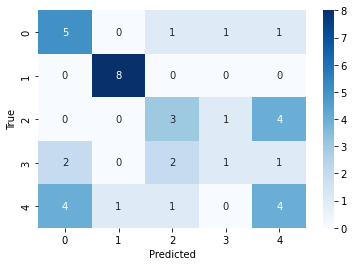

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# menghitung confusion matrix
conf_mat = confusion_matrix(y_test, predictions)

sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [129]:
# import joblib

# # simpan model dalam file .pkl
# joblib.dump(model, 'NaiveBayes.pkl')

In [130]:
x_pred = pd.read_csv("../csv/hasil_ekstraksi_orde1_glcm_Testing.csv")
x_pred

,Mean_h,Variance_h,Skewness_h,Kurtosis_h,Entropy_h,Mean_s,Variance_s,Skewness_s,Kurtosis_s,Entropy_s,Mean_v,Variance_v,Skewness_v,Kurtosis_v,Entropy_v
0,6480.0,5.099616e+08,5.844449,39.348677,3.100936,4556.25,116982260.0,5.383636,31.971245,4.391886,4556.25,51778460.0,2.295067,5.723955,4.597518
1,6480.0,6.333256e+08,6.295146,46.228403,2.911513,4556.25,117192440.0,5.449829,33.074875,4.460547,4556.25,102342650.0,3.838028,16.696967,4.271197
2,6480.0,6.845814e+08,6.414735,44.400667,2.898219,4556.25,170471970.0,5.866452,36.378179,4.210669,4556.25,111397610.0,5.144864,30.066745,4.367418
3,6480.0,1.075970e+09,8.635112,77.959419,2.829218,4556.25,246195040.0,5.390193,29.750922,3.722518,4556.25,82017600.0,3.364641,10.964418,4.464654
4,6480.0,2.219152e+09,9.428962,88.005582,2.035135,4556.25,248877600.0,4.859446,23.147476,3.674549,4556.25,142601540.0,3.902637,14.733704,4.088524
5,6480.0,1.727524e+09,10.616617,121.605013,2.317658,4556.25,249562320.0,4.951753,24.450192,3.666285,4556.25,147652700.0,4.175235,17.174742,4.061566
6,6480.0,1.989128e+09,9.197466,83.877012,2.174539,4556.25,381132130.0,6.385943,42.392234,3.407852,4556.25,162469680.0,4.103801,16.401354,3.990980
7,6480.0,1.727919e+09,9.044263,81.321540,2.250701,4556.25,152274670.0,3.753971,13.121468,4.046995,4556.25,204410820.0,5.155456,27.113626,3.932905
8,6480.0,5.160158e+08,4.789053,24.751244,3.050772,4556.25,208616030.0,4.870718,25.362884,3.720090,4556.25,56875390.0,2.578493,7.674567,4.570247
9,6480.0,5.991040e+08,5.510478,32.687136,2.934243,4556.25,255922240.0,4.645748,21.069979,3.516268,4556.25,63778490.0,2.647556,6.785041,4.519649


In [131]:
model.predict(x_pred)

C:\Users\makba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

In [132]:
x_pred["label"] = model.predict(x_pred)
x_pred

C:\Users\makba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


,Mean_h,Variance_h,Skewness_h,Kurtosis_h,Entropy_h,Mean_s,Variance_s,Skewness_s,Kurtosis_s,Entropy_s,Mean_v,Variance_v,Skewness_v,Kurtosis_v,Entropy_v,label
0,6480.0,5.099616e+08,5.844449,39.348677,3.100936,4556.25,116982260.0,5.383636,31.971245,4.391886,4556.25,51778460.0,2.295067,5.723955,4.597518,2
1,6480.0,6.333256e+08,6.295146,46.228403,2.911513,4556.25,117192440.0,5.449829,33.074875,4.460547,4556.25,102342650.0,3.838028,16.696967,4.271197,2
2,6480.0,6.845814e+08,6.414735,44.400667,2.898219,4556.25,170471970.0,5.866452,36.378179,4.210669,4556.25,111397610.0,5.144864,30.066745,4.367418,2
3,6480.0,1.075970e+09,8.635112,77.959419,2.829218,4556.25,246195040.0,5.390193,29.750922,3.722518,4556.25,82017600.0,3.364641,10.964418,4.464654,2
4,6480.0,2.219152e+09,9.428962,88.005582,2.035135,4556.25,248877600.0,4.859446,23.147476,3.674549,4556.25,142601540.0,3.902637,14.733704,4.088524,2
5,6480.0,1.727524e+09,10.616617,121.605013,2.317658,4556.25,249562320.0,4.951753,24.450192,3.666285,4556.25,147652700.0,4.175235,17.174742,4.061566,2
6,6480.0,1.989128e+09,9.197466,83.877012,2.174539,4556.25,381132130.0,6.385943,42.392234,3.407852,4556.25,162469680.0,4.103801,16.401354,3.990980,2
7,6480.0,1.727919e+09,9.044263,81.321540,2.250701,4556.25,152274670.0,3.753971,13.121468,4.046995,4556.25,204410820.0,5.155456,27.113626,3.932905,2
8,6480.0,5.160158e+08,4.789053,24.751244,3.050772,4556.25,208616030.0,4.870718,25.362884,3.720090,4556.25,56875390.0,2.578493,7.674567,4.570247,2
9,6480.0,5.991040e+08,5.510478,32.687136,2.934243,4556.25,255922240.0,4.645748,21.069979,3.516268,4556.25,63778490.0,2.647556,6.785041,4.519649,2
